In [25]:
from Bio import Phylo
from ete4 import Tree, PhyloTree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
#!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/multiz100way/hg38.100way.nh
#!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/multiz470way/hg38.470way.nh
#halStats --tree 241-mammalian-2020v2.hal > tree.txt

In [29]:
#tree = Tree("output/hg38.100way.nh")
#tree

In [32]:
tree = Phylo.read(
    #"output/experiments/tree.txt",
    "output/hg38.100way.nh",
    "newick"
)
Phylo.draw_ascii(tree)

                                              , hg38
                                             ,|
                                             || panTro4
                                             |
                                             | gorGor3
                                             |
                                            ,| ponAbe2
                                            ||
                                            || nomLeu3
                                            |
                                           ,| , rheMac3
                                           || |
                                           ||,| macFas5
                                           ||||
                                         __|||| papAnu2
                                        |  | |
                                        |  | |_ chlSab2
                                        |  |
                                        |  | _ calJac3
                        

In [33]:
leaves = tree.get_terminals()
D = np.array([[tree.distance(leaf1, leaf2) for leaf2 in leaves] for leaf1 in tqdm(leaves)])
D

100%|██████████| 100/100 [00:01<00:00, 80.90it/s]


array([[0.      , 0.01339 , 0.019734, ..., 2.037735, 1.594103, 2.043162],
       [0.01339 , 0.      , 0.020024, ..., 2.038025, 1.594393, 2.043452],
       [0.019734, 0.020024, 0.      , ..., 2.035929, 1.592297, 2.041356],
       ...,
       [2.037735, 2.038025, 2.035929, ..., 0.      , 1.243632, 2.346067],
       [1.594103, 1.594393, 1.592297, ..., 1.243632, 0.      , 1.902435],
       [2.043162, 2.043452, 2.041356, ..., 2.346067, 1.902435, 0.      ]])

<Axes: >

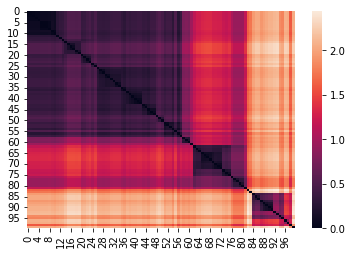

In [34]:
sns.heatmap(D)

In [35]:
W = D.sum(axis=1)
W.shape

(100,)

In [36]:
# alternatively could do distance to closest species?

In [37]:
species = pd.DataFrame(index=[node.name for node in tree.get_terminals()])
species["weight"] = W
species

,weight
hg38,80.386669
panTro4,80.415089
gorGor3,80.218121
ponAbe2,80.284627
nomLeu3,80.291635
...,...
gadMor1,167.647983
danRer10,197.013039
astMex1,193.999343
lepOcu1,154.857839


In [38]:
species["d_human"] = species.index.map(lambda s: tree.distance("hg38", s))  # hg38
#species = species.sort_values("d_human")
species

,weight,d_human
hg38,80.386669,0.000000
panTro4,80.415089,0.013390
gorGor3,80.218121,0.019734
ponAbe2,80.284627,0.039403
nomLeu3,80.291635,0.046204
...,...,...
gadMor1,167.647983,1.813375
danRer10,197.013039,2.068487
astMex1,193.999343,2.037735
lepOcu1,154.857839,1.594103


<Axes: xlabel='d_human'>

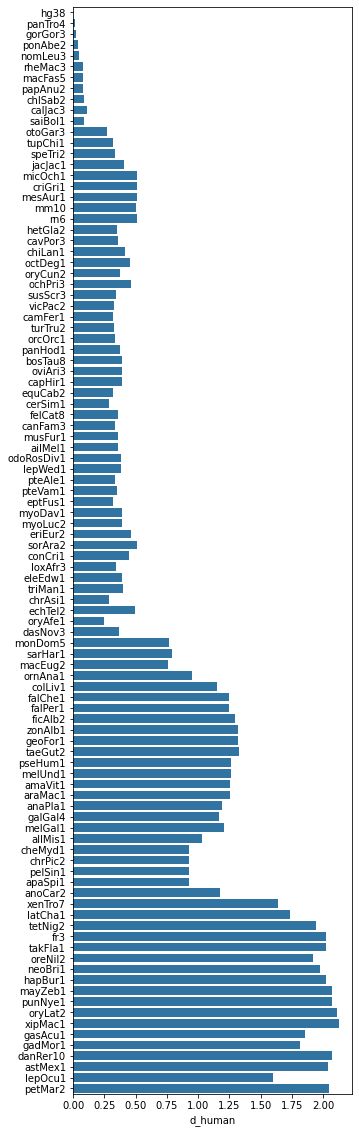

In [42]:
plt.figure(figsize=(5, 20))
sns.barplot(data=species, y=species.index, x="d_human", color="C0")
# there seems to be a bug with oryAfe3 (in multiz100way)
# or could it be it just has a low mutation rate?

<Axes: xlabel='weight'>

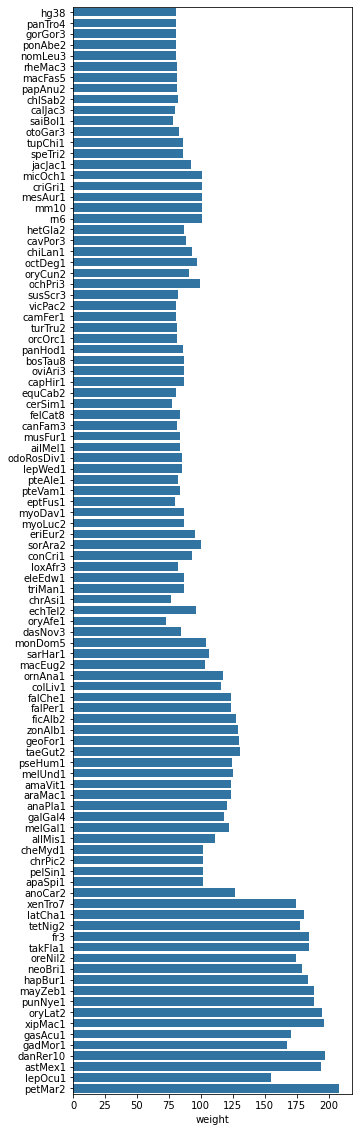

In [43]:
plt.figure(figsize=(5, 20))
sns.barplot(data=species, y=species.index, x="weight", color="C0")

In [11]:
(species.d_human >= species.loc["Otolemur_garnettii"].d_human).sum()

209

In [14]:
species = species[
    (species.d_human==0.0) |  # target genome
    (species.d_human >= species.loc["Otolemur_garnettii"].d_human)  # filter species too close to target genome
]
species

,d_human
Homo_sapiens,0.00000
Otolemur_garnettii,0.20324
Nycticebus_coucang,0.21605
Lemur_catta,0.21963
Cheirogaleus_medius,0.22963
...,...
Mus_musculus,0.73443
Mus_caroli,0.73560
Acomys_cahirinus,0.73939
Mus_spretus,0.74015


In [15]:
species_index = np.arange(len(species))
species_index = np.concatenate([[0], species_index[1::4]])

species = species.iloc[species_index]  # subsample: for computational efficiency and rapid iteration
print(species.shape)
species

(54, 1)


,d_human
Homo_sapiens,0.00000
Otolemur_garnettii,0.20324
Daubentonia_madagascariensis,0.23824
Indri_indri,0.25972
Tupaia_chinensis,0.37317
Ctenodactylus_gundi,0.40827
Castor_canadensis,0.41721
Dipodomys_ordii,0.43082
Dicerorhinus_sumatrensis,0.44089
Tapirus_indicus,0.44977


In [5]:
#species.to_csv("species/all.txt", header=False, columns=[])